In [25]:
import tensorflow as tf #note: I'm using tensorflow version 1.15

In [26]:
from tensorflow.examples.tutorials.mnist import input_data #importing MNIST data

In [27]:
fmnist = input_data.read_data_sets("MNIST_data/", one_hot = True) #Loading MNIST data

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
fmnist
#in o/p you can see it says Datasets, because that is the datatype of fmnist. Also, it specifies that this dataset includes
#trainig data, testing data and validation data as well

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001E3160CCB48>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001E3160CC788>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001E3160CCB08>)

In [29]:
#Since, the dataset consists of images, let's see how many images are there in the trainig data
#Also, we know that images are represented by encoding each of their pixels as an 2d-array element. However, here we have 
#flattened data i.e. represented in 1d array.
#fmnist.train.images to view image arrays
fmnist.train.images.shape
#It contains 55,000 images,each represented by a 1d array of 784 elements, thus in 2d array it must be 28X28 

(55000, 784)

In [30]:
fmnist.test.images.shape

(10000, 784)

In [31]:
fmnist.validation.images.shape

(5000, 784)

In [32]:
fmnist.train.labels #labels in the training dataset
#As you can see, each image's label is a digit (0 to 9) which is present in the image

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [33]:
fmnist.train.labels.shape

(55000, 10)

In [34]:
#This is a multi-class classification problem as there are more than 2 (i.e. 10) classes/labels here, thus, the o/p layer
#of our neural network will have 10 units each will o/p 0 or 1 as each will represent a class. 
#e.g. o/p will be [0, 0, 0, 0, 0, 0, 0, 1, 0] if digit predicted is 8.
#Thus, we need to do one-hot encoding of our Y data (label data)
#We don't have to do it manually, just add parameter one_hot = true while loading the mnist dataset, and we're done
#Now, if you run the fmnist.train.labels.shape, you won't get (55000,) instead (55000, 10), because now each of the 55000
#rows contains an array which represents a digit in the same way in which we get the o/p from our neural network.

In [35]:
import numpy as np
from matplotlib import pyplot as plt

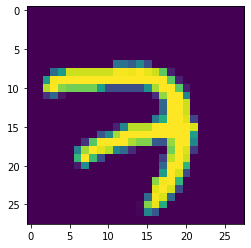

In [36]:
#Now, that we have our data ready in the required format, let's plot the images
first_image = fmnist.train.images[0]
#The problem while plotting this image is that the image is not a 2d array but it's a flattened image i.e. 1d array
#So, let's unflatten it by reshaping the 1d arrays of 784 elements each into 2d arrays of dimension 28X28
#We'll first make it an np array so that it becomes easy to reshape it.
first_image = np.array(first_image, dtype = 'float')
first_image = first_image.reshape((28, 28))
plt.imshow(first_image)
plt.show()
#This image has the digit 7

In [37]:
#This is our first image in the training dataset, we can view others too if we want to.

In [38]:
#Architecture of our neural network:-
#As the images are in flattened format in 1d array each of 784 elements, thus each image that we feed to our neural network
#we are acually feeding it 784 features as i/p, thus, our neural network will have 784 units in the i/p layer
n_input = 784
#And as discussed earlier our o/p layer will have 10 units
n_classes = 10
#How do we decide how many hidden layers to use and how many units in each of those hidden layers?
#Let's just choose no. hidden layers to be 2
#Also, there's no formula to calculate number of units to use in each hidden layer. Generally, we keep it in the same order
#as that of i/p. Since, we have 784 i/p units, we'll pick a value between 100 to 1000. Let's take 256 for both hidden layers
n_hidden_1 = 256
n_hidden_2 = 256
#Also, we'll be having 3 biases: 1 in i/p layer, 1 in hidden layer1, 1 in hidden layer 2
#Number of weights in hidden layer1 (i.e. going from i/p layer to hidden layer) will be 784*256
#Number of bias weights in hidden layer1 will be 1*256 = 256
#Number of weights in hidden layer2 (i.e. going from hidden layer1 to hidden layer2) will be 256*256
#Number of bias weights in hidden layer2 will be 1*256 = 256
#Number of weights in o/p layer (i.e. going from hidden layer2 to o/p layer) will be 256*10
#Number of bias weights in o/p layer will be 1*256 = 256

#Architecture of weights and biases
#Instead of storing these as n_hidden1_weight, n_hidden2_weight, n_hidden1_bias, etc.. We will create a single variable named
#weights which will contain a dictionary of weights in each layer.
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])), #tf.random_normal([dimensions]) returns random values in the mentioned dimensions from a normal distribution 
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes])),
}
biases = {
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])),
}

#To store all these values we don't use tf.constants because these values are going to change over time
#To store all these values we don't use tf.placeholder because we won't enter these values by getting i/p from the user
#We use tf.variable

In [39]:
#Forward Propagation
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1']) #net(total) input going into hidden layer1 (remember WX + B)
    out_layer1 = tf.nn.relu(in_layer1) #output of hidden layer1. We are using RELU activation function in each unit of hidden layer1
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])#net(total) input going into hidden layer2
    out_layer2 = tf.nn.relu(in_layer2) #output of hidden layer2. We are using RELU activation function in each unit of hidden layer2
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])#net(total) input going into o/p layer
    return output #Identity activation function (No specific activation function) in output layer unit

In [40]:
#Before going ahead and finding the optimal values of weights, let's use these random weight values and do forward propagation
#and find out y_pred i.e. output and check its accuracy.
#We can pass the weights and biases as arguments because we have already defined what they are above., but, ww haven't 
#defined what x is, as x could sometimes be training data, sometimes be testing data or validation data.
#Thus, we should use placeholder to define x
#As we do know that no matter what x is, it's dimensions will be (None(bcoz each will have different no. of images))X(no_of_features), thus we use the shape parameter of placeholder
x = tf.placeholder("float", [None, n_input])
#Similartly we can define y, each o/p is a vector of size 10 (= no. of classes)
y = tf.placeholder("int32", [None, n_classes])

pred = forward_propagation(x, weights, biases)

In [41]:
#In tensorflow,we don't need to update the weights manually. We just have to find the cost and then use any in-built
#optimizer which will optimize the weights.
#Let's define the cost function
cost = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y)  #We will use the cross-entropy error function to calculate the cost

In [42]:
#We don't want the error to be an array of values which show the error in each label's prediction for each image.
#We need a single value
#So, let's take the mean
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))

In [43]:
#We'll use any of the in-built optimizers to do backpropagation and optimize the weights, which we were doing manually,
#when we were not using tensorflow
optimizer =  tf.train.AdamOptimizer(learning_rate = 0.01)
#As we want the optimizer to optimize in such a way that it minimizes the cost
optimize = optimizer.minimize(cost)

In [44]:
#Let us now remove the previously created session and then re run the notebook and then create a new fresh session
#And thus initialize everything again and run all the predictions again
#And then also run the cost function which we created and then also run the optimizer and get the optimized weights

In [45]:
#First, we need to initialize all the variables (weights, biases, etc..) which we had just declared but not initialized
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [46]:
# #Now, we have the o/p in pred, which is an array containing an array of size 10 for each o/p.
# #We want to know the index containing the highest value. That index is the digit that is predicted in case of that particular array
# predictions = tf.argmax(pred, 1) #tf.max will return the maximum value from the array, but, argmax will return the index at which the maximum valued element is present.
# #We have also passed 1 as an argument because it is the axis i.e. it tells that we need index of maximum value from each array present in the array pred
# true_labels = tf.argmax(y, 1)
# #Thus, we have all the digits predicted by our neural network stored in 'predictions', and all the digits which are our y_actual in correct_labels
# correct_predictions = tf.equal(predictions, true_labels) #To see whether our predictions are same as the actual labels

In [47]:
# #Now, let's make the predictions, and also evaluate the labels and also the correct_predictions
# predictions_eval, labels, correct_pred = sess.run([predictions, true_labels, correct_predictions], feed_dict = {x:fmnist.train.images, y:fmnist.train.labels})
# #We need to feed x to evaluate predictions, and y to evaluate labels
# predictions_eval, labels, correct_pred
# #Each time you run this cell, you'll get a different o/p as each time initialization is happening. Thus, shifting the 
# #initialization code to one of the above cells
# #Now, we'll get the same predictions each time you run this cell

# #Wherever you're getting a true -> correct prediction, false -> incorrect prediction

In [48]:
# #To see number of correct predictions
# correct_pred.sum()

In [49]:
# for i in range(25): 
#     c, _ = sess.run([cost, optimize], feed_dict={x:fmnist.train.images, y:fmnist.train.labels}) #since we're calling 2 things we
#     #need 2 things on the left of =, as we won't be using the second thing, we just name it _, we're doing it just for the sake 
#     #of providing the second thing
#     print(c)
#     #Now, if you run it second time you'll see a much lesser value of cost (c) as we have also called optimize which optimizes 
#     #the weights each time we run this cell. If you run just once, you'll get the unoptimized cost. Thus, to run it multiple
#     #times, let's use a loop.
#     #Note that, there's no guarantee that the error will just go on decreasing as we iterate again and again, it may increase
#     #or decrease depending upon the learning rate.

In [50]:
#Instead of iterating 25 times on the entire training dataset like above, we will use batch gradient descent(refer notes)
#where batch size is 100. Training data consists of 55000 images, thus we will have 55000/100 = 550 batches.
batch_size = 100
for i in range(25):
    num_batches = int(fmnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = fmnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimize], feed_dict={x:batch_x, y:batch_y}) #since we're calling 2 things we
        #need 2 things on the left of =, as we won't be using the second thing, we just name it _, we're doing it just for the sake 
        #of providing the second thing
        total_cost += c
    print(total_cost)
        #Now, if you run it second time you'll see a much lesser value of cost (c) as we have also called optimize which optimizes 
        #the weights each time we run this cell. If you run just once, you'll get the unoptimized cost. Thus, to run it multiple
        #times, let's use a loop.
        #Note that, there's no guarantee that the error will just go on decreasing as we iterate again and again, it may increase
        #or decrease depending upon the learning rate.

25218.526025295258
4734.448161499173
2574.7900358829734
1819.3838437007291
1346.2928699476502
1186.1116715537717
1066.7967991355274
870.2685128161651
887.8457492822466
632.010648095446
651.0599048831956
615.5070192349236
481.15489542786685
530.501262331319
402.39424967730076
306.00140325062654
241.1070828425345
285.87195891328554
247.8861956161068
239.24912589204902
213.766886587986
155.14901219525865
145.54262537622938
92.91391068375833
117.83691822408434


In [51]:
#Now, that we have optimized our neural network let's use it to make predictions
#Now, we have the o/p in pred, which is an array containing an array of size 10 for each o/p.
#We want to know the index containing the highest value. That index is the digit that is predicted in case of that particular array
predictions = tf.argmax(pred, 1) #tf.max will return the maximum value from the array, but, argmax will return the index at which the maximum valued element is present.
#We have also passed 1 as an argument because it is the axis i.e. it tells that we need index of maximum value from each array present in the array pred
true_labels = tf.argmax(y, 1)
#Thus, we have all the digits predicted by our neural network stored in 'predictions', and all the digits which are our y_actual in correct_labels
correct_predictions = tf.equal(predictions, true_labels) #To see whether our predictions are same as the actual labels

#Now, let's make the predictions, and also evaluate the labels and also the correct_predictions
predictions_eval, labels, correct_pred = sess.run([predictions, true_labels, correct_predictions], feed_dict = {x:fmnist.train.images, y:fmnist.train.labels})
#We need to feed x to evaluate predictions, and y to evaluate labels
predictions_eval, labels, correct_pred
#Each time you run this cell, you'll get a different o/p as each time initialization is happening. Thus, shifting the 
#initialization code to one of the above cells
#Now, we'll get the same predictions each time you run this cell
#Wherever you're getting a true -> correct prediction, false -> incorrect prediction

#To see number of correct predictions
correct_pred.sum()

53786